# **Project: Card Image Classification**
---

## **Introduction**
---

Welcome to an exciting project where we will be exploring the fascinating world of image recognition! Our project focuses on the task of classifying a set of poker cards into 53 different categories based on their type.

Using a Convolutional Neural Network (CNN) model, we will train our model to accurately classify images of poker cards into any of the 53 categories. Our dataset, which was obtained from a popular data science community, Kaggle, contains a total of 8154 images of poker cards, divided into 7624 train, 265 test, and 265 validation sets. Each image is a 224 x 224 3-dimensional jpg format.

The dataset we used for this project can be found on the Kaggle website at the following link: [Cards Image Dataset-Classification](https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification). This project will not only teach us how to build a powerful image recognition model using a CNN model, but it will also give us a deeper understanding of the complexities involved in training a machine learning algorithm to recognize images. So, buckle up, and let's dive into this thrilling project together!

### Project Break Down: 
The project would be broken down in the following:
Certainly! Here's a breakdown of what this image recognition project will entail:

1. **Data Wrangling:** We will download the poker card image dataset from Kaggle and examine the images to gain insights into the data.

2. **Data Preprocessing:** We will preprocess the images by resizing them to a standard size and converting them into an array format suitable for feeding into our CNN model.

3. **Data Augmentation:** We will use data augmentation techniques such as image rotation, flipping, and zooming to increase the size of our dataset and improve the robustness of our model.

4. **Model Building:** We will build a CNN model using Keras with TensorFlow backend, and train the model using our preprocessed dataset. We will experiment with different architectures, hyperparameters, and optimization algorithms to achieve optimal performance.

5. **Model Evaluation:** We will evaluate the performance of our model using various metrics such as accuracy, precision, recall, and F1 score, and visualize the results using confusion matrix and classification report.

6. **Model Deployment:** We will deploy our trained model to make predictions on new, unseen poker card images, and visualize the predictions.



## **Project Packages.**
---


### Python Packages.


Python packages used in this project can be found below: 

In [1]:
# Data Manipulation Packages.
import pandas as pd
import numpy as np

# File manager Packages. 
import os
from google.colab import files
from IPython.display import display

# Data Visualization Packages. 
import matplotlib.pyplot as plt

# Tensorflow Packages. 
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


## **Data Wrangling**
---

### Data Collection:

We will be downloading our dataset form kaggle and extracting the data from the zip foulder it enclosed in using zipfile package.

In [2]:
# Define dataset folder. 
! mkdir 1.Dataset.

#### Kaggle Data Import

We will be downloading our dataset directly from kaggle to our colab notebook using the kaggle api. 

In [3]:
# Install kaggle api with Pip. 
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Uploading Kaggle api token key.
from google.colab import files

files.upload()

In [5]:
# Changing api token location.
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [6]:
# set the appropriate permissions 
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# verify api key.
!kaggle datasets list


ref                                                       title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                     Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          15476        417  1.0              
chitrakumari25/corona-virus-latest-data-2023              Corona virus latest data 2023                      10KB  2023-04-29 16:00:51           1461         38  1.0              
utkarshx27/starbucks-nutrition                            Starbucks Nutrition Facts                           2KB  2023-05-10 05:42:59            924         35  1.0              
utkarshx27/monthly-transportation-statistics              Monthly Transportation Statistics         

In [8]:
# Downloading dataset. 
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

 99% 380M/385M [00:05<00:00, 83.2MB/s]
100% 385M/385M [00:05<00:00, 78.6MB/s]


In [ ]:
# Unzip folder. 
! unzip cards-image-datasetclassification.zip -d 1.Dataset.

### Data Review.

We will be viewing our dataset and visulize them using matplotlib image show package. 

In [10]:
# Defining data directories. 
data_dir = os.path.join("/content/1.Dataset.")

# Folder content.
os.listdir(data_dir)

['14card types-14-(200 X 200)-94.61.h5',
 'test',
 'train',
 'cards.csv',
 'valid',
 '53cards-53-(200 X 200)-100.00.h5']

In [11]:
# Defining card path
card_path = os.path.join(data_dir, 'cards.csv')

# Read card.csv to padas.
cards_csv = pd.read_csv(card_path)

# Viewing data.
print(f"File shape: {cards_csv.shape}\n")
print(f"Data columns: {cards_csv.columns}\n")

File shape: (8155, 5)

Data columns: Index(['class index', 'filepaths', 'labels', 'card type', 'data set'], dtype='object')



In [12]:
# Data layer-out
display(cards_csv.head(1))
print("\n\n")

# Training data sample
print(f"\t######################## Train Data Sample ########################\n")
train_sample = cards_csv[cards_csv['data set'] == 'train'].sample(n=10)
display(train_sample)
print("\n\n")

# Testing data sample
print(f"\t######################## Test Data Sample ########################\n")
test_sample = cards_csv[cards_csv['data set'] == 'test'].sample(n=10)
display(train_sample)
print("\n\n")

# Validation data
print(f"\t######################## Validation Data Sample ########################\n")
valid_sample = cards_csv[cards_csv['data set'] == 'valid'].sample(n=10)
display(valid_sample)
print("\n\n")


,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train





	######################## Train Data Sample ########################



,class index,filepaths,labels,card type,data set
3195,21,train/king of clubs/077.jpg,king of clubs,king,train
6254,43,train/ten of hearts/024.jpg,ten of hearts,ten,train
4862,33,train/seven of clubs/040.jpg,seven of clubs,seven,train
7184,50,train/two of diamonds/003.jpg,two of diamonds,two,train
7552,52,train/two of spades/083.jpg,two of spades,two,train
6730,46,train/three of diamonds/087.jpg,three of diamonds,three,train
3364,22,train/king of diamonds/118.jpg,king of diamonds,king,train
3210,21,train/king of clubs/092.jpg,king of clubs,king,train
7403,51,train/two of hearts/089.jpg,two of hearts,two,train
3447,23,train/king of hearts/066.jpg,king of hearts,king,train





	######################## Test Data Sample ########################



,class index,filepaths,labels,card type,data set
3195,21,train/king of clubs/077.jpg,king of clubs,king,train
6254,43,train/ten of hearts/024.jpg,ten of hearts,ten,train
4862,33,train/seven of clubs/040.jpg,seven of clubs,seven,train
7184,50,train/two of diamonds/003.jpg,two of diamonds,two,train
7552,52,train/two of spades/083.jpg,two of spades,two,train
6730,46,train/three of diamonds/087.jpg,three of diamonds,three,train
3364,22,train/king of diamonds/118.jpg,king of diamonds,king,train
3210,21,train/king of clubs/092.jpg,king of clubs,king,train
7403,51,train/two of hearts/089.jpg,two of hearts,two,train
3447,23,train/king of hearts/066.jpg,king of hearts,king,train





	######################## Validation Data Sample ########################



,class index,filepaths,labels,card type,data set
8056,33,valid/seven of clubs/2.jpg,seven of clubs,seven,valid
8124,46,valid/three of diamonds/5.jpg,three of diamonds,three,valid
8074,36,valid/seven of spades/5.jpg,seven of spades,seven,valid
8058,33,valid/seven of clubs/4.jpg,seven of clubs,seven,valid
7930,8,valid/five of clubs/1.jpg,five of clubs,five,valid
7953,12,valid/four of clubs/4.jpg,four of clubs,four,valid
8073,36,valid/seven of spades/4.jpg,seven of spades,seven,valid
7966,15,valid/four of spades/2.jpg,four of spades,four,valid
8027,27,valid/nine of hearts/3.jpg,nine of hearts,nine,valid
8080,38,valid/six of diamonds/1.jpg,six of diamonds,six,valid


In [13]:
# Define the training, testing, and Validation directories. 
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

In [14]:
train_sample.filepaths.to_list()

['train/king of clubs/077.jpg',
 'train/ten of hearts/024.jpg',
 'train/seven of clubs/040.jpg',
 'train/two of diamonds/003.jpg',
 'train/two of spades/083.jpg',
 'train/three of diamonds/087.jpg',
 'train/king of diamonds/118.jpg',
 'train/king of clubs/092.jpg',
 'train/two of hearts/089.jpg',
 'train/king of hearts/066.jpg']

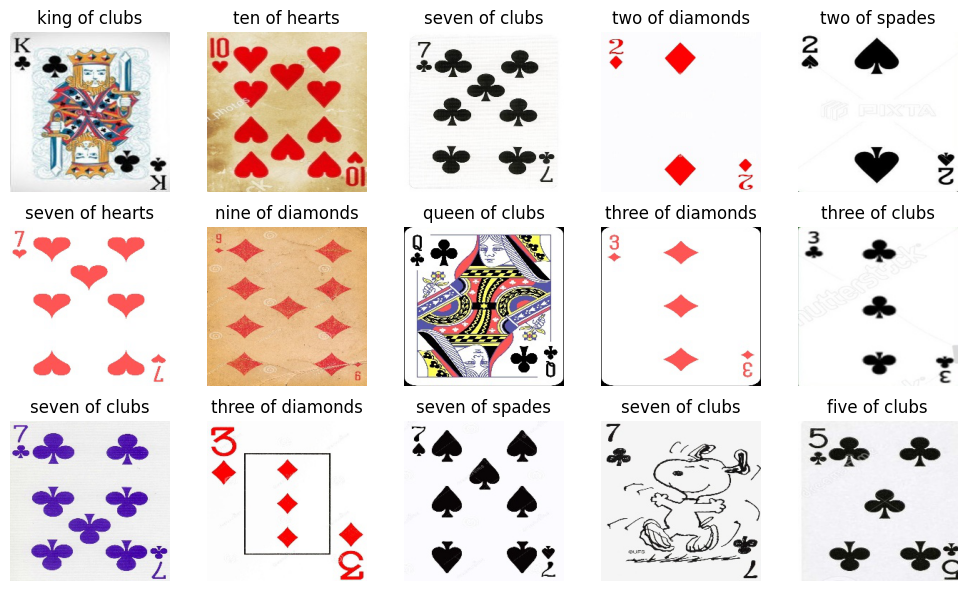

In [15]:
# Visualizing Images. 

## Extracting file path. 
train_filepaths = train_sample.filepaths.to_list()[:5]
test_filepaths = test_sample.filepaths.to_list()[:5]
valid_filepaths = valid_sample.filepaths.to_list()[:5]

## Define full image path.
image_filepaths = train_filepaths + test_filepaths + valid_filepaths
image_files = [os.path.join(data_dir, file) for file in image_filepaths]

## Image rows and cols.
num_images = len(image_files)
num_rows = 3  # You can adjust the number of rows and columns as desired
num_cols = num_images // num_rows

## Define image shape.
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 6))

# Displaying images. 
for i, image_file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols
    image = plt.imread(image_file)
    axs[row, col].imshow(image)
    axs[row, col].set_title(image_file.split("/")[-2])
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


## **Data Preprocessing & Augmentation**
---

For the is phase of we would be cleaning our dataset by normalizing it,and some data augmentation to increase our training dataset.

In [16]:
# Inititalizing training ImageDataGeneration. 
train_datagen = ImageDataGenerator(rescale = 1/224.0
                                  #  , rotation_range = 90
                                  #  , width_shift_range = 0.7
                                  #  , height_shift_range = 0.7
                                  #  , zoom_range = 0.5
                                  #  , horizontal_flip = True
                                  #  , vertical_flip = True
                                  #  , fill_mode= 'nearest'
                                   )

# Defining training data flow and labeling. 
train_gen = train_datagen.flow_from_directory(train_dir
                                              , target_size = (224, 224)
                                              , batch_size = 70
                                              , class_mode = 'categorical')

# Initializing validation Image generator. 
valid_datagen = ImageDataGenerator(rescale = 1/224.0)

# Defining validation data flow & labeling. 
valid_gen = valid_datagen.flow_from_directory(valid_dir
                                              , target_size = (224, 224)
                                              , batch_size = 25
                                              , class_mode ='categorical')

# Initializing testing Image generator. 
test_datagen = ImageDataGenerator(rescale = 1/224.0)

# Defining testing data flow & labeling. 
test_gen = test_datagen.flow_from_directory(test_dir
                                            , target_size = (224, 224)
                                            , batch_size = 25
                                            , class_mode = 'categorical')

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


IndexError: ignored

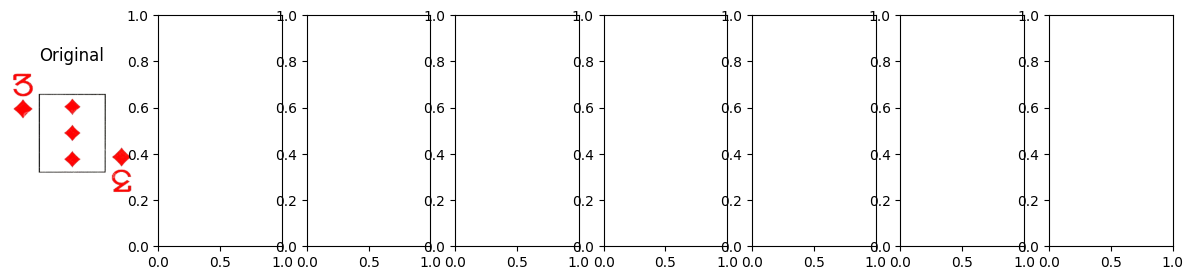

In [17]:
# Checking if data augmentation is working. 

## Defining image data path.
testing_aug = valid_sample.filepaths.to_list()[1]
testing_aug = plt.imread(os.path.join(data_dir, testing_aug))
testing_aug = np.expand_dims(testing_aug, axis = 0)

## Inputing image to image generator. 
test_aug_gen = next(train_datagen.flow(testing_aug, batch_size = 8))

## Visualizing image. 
fig, axes = plt.subplots(1, 8, figsize=(15, 3))
titles = ['Original', 'Augmented 1', 'Augmented 2', 'Augmented 3', 'Augmented 4', 
          'Augmented 5', 'Augmented 6', 'Augmented 7']

for i, ax in enumerate(axes):
    ax.imshow(test_aug_gen[i])
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


There seems to be a problem with our data augmentation, but in other not to let it hold us we will proceed with the existing dataset and come back when we are trying to optimize the model performance. 

## **Model Building**
---

### Hyperparameters.

The hyparaparameters used for training and other variables like batch size, image size, etc. will be defined below:

In [18]:
# Tensorflow Hyper-parameters.
lr = 0.001
batch_size = 10
epoch_size = 10


### Model Structure & summary. 

In [ ]:
# Model Architeture. 
model = Sequential([ # Defining Convolution layers. 
                    
                    ## First convolution layer. 
                    Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu')
                    , MaxPooling2D((3, 3))
                    ## Second convolutional layer.
                    , Conv2D(32, (3, 3), activation = 'relu')
                    , MaxPooling2D((3, 3))
                    ## Third convolutional layer.
                    , Conv2D(64, (3, 3), activation = 'relu')
                    , MaxPooling2D((3,3))
                    ## Fourth convolutional layer.
                    , Conv2D(128, (3, 3), activation = 'relu')

                    # Defining Dense neuroal network layers. 

                    ## Flattent input layer.
                    , Flatten()
                    ## Firest hidden layer.
                    , Dense(525, activation = 'relu')
                    ## Second hidden layer.
                    , Dense(250, activation = 'relu')
                    ## Output layer. 
                    , Dense(53, activation = 'softmax')
                    ])

  
# Model compile. 

## Training Optimizer 
adam_optimizer = Adam(learning_rate = lr)
rmsprop_optimizer = RMSprop(learning_rate = lr)

## Compile. 
model.compile(optimizer = rmsprop_optimizer 
              , loss = 'categorical_crossentropy'
              , metrics = ['accuracy'])

# Training model 
history = model.fit(train_gen
                    , epochs = epoch_size
                    , validation_data = valid_gen
                    , verbose = 1)

Epoch 1/10
109/109 [==============================] - 282s 3s/step - loss: 3.0602 - accuracy: 0.1911 - val_loss: 2.0247 - val_accuracy: 0.3396
Epoch 2/10
109/109 [==============================] - 277s 3s/step - loss: 2.1094 - accuracy: 0.3760 - val_loss: 1.4512 - val_accuracy: 0.5321
Epoch 3/10
109/109 [==============================] - 285s 3s/step - loss: 1.6604 - accuracy: 0.5177 - val_loss: 1.2276 - val_accuracy: 0.5774
Epoch 4/10
109/109 [==============================] - 275s 3s/step - loss: 1.2904 - accuracy: 0.6316 - val_loss: 0.8918 - val_accuracy: 0.7170
Epoch 5/10
109/109 [==============================] - 283s 3s/step - loss: 0.9808 - accuracy: 0.7167 - val_loss: 0.8106 - val_accuracy: 0.7698
Epoch 6/10
 30/109 [=======>......................] - ETA: 3:14 - loss: 0.7431 - accuracy: 0.7875

In [ ]:
# Visualize model performance. 

## Extracting training data. 
history = pd.DataFrame(history.history)

## Plotting model performance. 
history.plt()
plt.grid('off')
plt.show(); 

### Model Evaluation & Prediction. 


Using the testing dataset we will be evaluating our model performance, making prediction with unseen images. 

In [ ]:
# Evaluate model. 
history.evaluation(test_gen)

In [ ]:
# Making prediction with unseen image. 

## Uploading images
upload = files.upload()

## Looping and preprocessing images. 
for img in upload.key():
    ### Loading and converting image to array.
    img = load_img(img)
    img_arr = img_to_array(img)

    ### Expanding array dimension and arragement.
    img_arr = np.expand_dims(img_arr, axis = 0)
    img_arr = np.vstack([img_arr])

    ### Make prediction. 
    pred = history.predict(img_arr)
    print(pred)
    